In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_regression, make_classification

import sklearn
print(sklearn.__version__)

1.0.2


In [15]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

### Using Random Forest Regression example from https://machinelearningmastery.com/random-forest-ensemble-in-python/

(30, 500) (30,)


array([[ 0.8202154 , -0.65988661,  0.62373844, ...,  1.06693609,
         0.02902349, -0.30946996],
       [ 1.47820772,  1.1578584 , -0.05903637, ...,  0.00311812,
         0.06850639, -0.72129759],
       [ 0.44181576,  0.9268464 , -0.09378014, ...,  1.41771199,
        -0.8257821 , -0.75068001],
       ...,
       [-0.19445365,  0.35018714,  1.50215385, ..., -1.18837196,
         0.48809658, -1.19404386],
       [ 0.89327189, -0.90925123,  1.10343604, ..., -0.32814962,
        -1.39954764,  0.6894148 ],
       [-0.27275254,  1.34438931,  0.06828602, ...,  0.39851532,
         0.76492346, -0.62086914]])

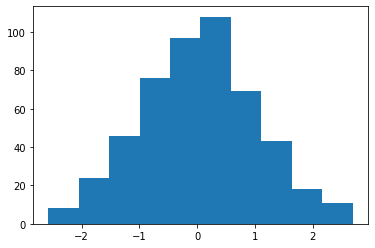

In [16]:
# test regression dataset
# define dataset
X, y = make_regression(n_samples=30, n_features=500, n_informative=200, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)
display(X)

plt.hist(X[0]);

In [17]:
# evaluate random forest ensemble for regression

# define the model
model = RandomForestRegressor()
# evaluate the model

## To do leave-one-out, set n_splits = n_observations in your training data 
cv = RepeatedKFold(n_splits=30, n_repeats=1, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -816.813 (497.037)


# Random Forest Regressor on normalized + filtered lipidomics data

### ~1029 features, 30 observations, predict the RBG or FBG glucose value 

1. Extract all the rawfile columns that were used for quant in RBG and FBG 
2. Extract BG value from obs dataset 
3. Pass into RF model 


In [19]:
fbg_feats = fr_filt[fr_quant_filenames_in_analytical_order].filter(regex='FBG')
rbg_feats = fr_filt[fr_quant_filenames_in_analytical_order].filter(regex='RBG')
rbg_feats

,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210408_10wk_RBG.raw (F16),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210330_8wk_RBG.raw (F36),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210413_10wk_RBG.raw (F40),20210729_AJ_Toh_RatBloodGlucose_T1076M_20210325_8wk_RBG.raw (F24),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210406_9wk_RBG.raw (F50),...,20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210408_10wk_RBG.raw (F8),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
Unique Identifier,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,1.692144e+07,1.566949e+07,1.547355e+07,2.247304e+07,1.431735e+07,1.997903e+07,1.615157e+07,1.266238e+07,1.215426e+07,1.946815e+07,...,9.721337e+06,8.914997e+06,9.046158e+06,1.077300e+07,5.531159e+06,6.994745e+06,1.070997e+07,1.209106e+07,1.521186e+07,1.287036e+07
unknown_641.1087_0.537,5.397037e+07,3.211882e+07,2.880749e+07,3.485691e+07,3.194869e+07,4.457727e+07,3.496832e+07,1.740376e+07,2.454015e+07,3.680000e+07,...,2.802334e+07,2.250254e+07,2.406236e+07,1.363104e+07,1.093399e+07,1.450121e+07,5.986366e+06,2.470116e+07,2.958833e+07,2.500831e+07
unknown_951.15973_0.541,3.166872e+07,1.878361e+07,1.296374e+07,9.434457e+06,1.673459e+07,2.073733e+07,1.431970e+07,3.576560e+06,2.786574e+07,1.983307e+07,...,1.460625e+07,1.747228e+07,1.185835e+07,6.140714e+06,9.971310e+06,1.665659e+07,1.680713e+07,1.550470e+07,1.760080e+07,1.150525e+07
unknown_329.03067_0.542,6.605294e+07,1.695412e+08,1.790263e+08,2.032554e+08,1.856095e+08,1.732693e+08,2.587329e+08,1.673751e+08,1.650767e+08,1.710690e+08,...,1.603498e+08,1.598825e+08,1.474987e+08,7.681858e+07,1.261985e+08,7.420931e+07,1.560455e+08,1.314945e+08,1.515549e+08,9.377535e+07
unknown_969.13147_0.544,1.661334e+07,9.535690e+06,7.278404e+06,5.525663e+06,9.185493e+06,7.613260e+06,6.029466e+06,2.712726e+06,1.015049e+07,1.030309e+07,...,7.868903e+06,8.111235e+06,7.136770e+06,3.928397e+06,4.907544e+06,4.845314e+06,9.316513e+06,7.424281e+06,3.528424e+06,4.333287e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown_897.82532_20.148,2.481922e+05,2.320982e+05,4.682044e+05,3.143235e+05,2.956670e+05,1.754775e+05,2.958877e+05,1.428722e+05,1.123953e+06,3.430160e+05,...,6.044960e+05,1.517734e+05,3.523582e+05,4.426777e+05,5.230112e+05,2.218954e+05,2.796698e+05,1.996501e+05,1.643549e+05,1.246668e+05
unknown_974.9118_20.163,3.533019e+05,2.808853e+05,2.899547e+05,4.740242e+05,3.320172e+05,1.485403e+05,3.628107e+05,1.926487e+05,2.069062e+06,5.573711e+05,...,8.729563e+05,2.918566e+05,4.255684e+05,5.414527e+05,4.122617e+05,1.708742e+05,4.560872e+05,1.067780e+05,3.509267e+05,2.051803e+05
unknown_593.58716_20.175,1.838481e+05,1.709479e+05,3.188858e+05,2.156390e+05,2.068629e+05,1.365602e+05,2.231748e+05,1.328701e+05,1.139955e+06,2.575344e+05,...,5.024885e+05,1.325956e+05,2.935374e+05,4.240754e+05,4.497607e+05,1.417538e+05,2.240424e+05,1.907102e+05,1.287581e+05,1.055227e+05


In [21]:
## Correlate lipid feature quants to blood glucose measurement
fg = file_grouping.set_index('fr_name')
rbg_values = fg[fg.index.isin(rbg_feats.columns)]['bg']
fbg_values = fg[fg.index.isin(fbg_feats.columns)]['bg']

## RBG leave-one-out 

In [28]:
rbg_values

fr_name
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4)      225.000000
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44)      70.500000
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52)     69.500000
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6)       83.000000
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210408_10wk_RBG.raw (F16)    139.500000
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210330_8wk_RBG.raw (F36)     108.500000
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58)    352.000000
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210413_10wk_RBG.raw (F40)     71.500000
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210325_8wk_RBG.raw (F24)     387.666667
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210406_9wk_RBG.raw (F50)      83.000000
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210408_10wk_RBG.raw (F34)    330.500000
20210729_AJ_Toh_RatBloodGlucose_T1074M_20210401_9wk_RBG.raw (F20)     203.500000
20210729_AJ_Toh_RatB

In [29]:
rbg_loo = RandomForestRegressor()  # loo = leave-one-out

# evaluate the model
## To do leave-one-out, set n_splits = n_observations in your training data 
cv = RepeatedKFold(n_splits=30, n_repeats=1, random_state=1)
n_scores = cross_val_score(estimator=rbg_loo, 
                           X=rbg_feats.T, 
                           y=rbg_values, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, 
                           n_jobs=-1, 
                           error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -59.166 (61.210)


In [ ]:
rbg_loo

In [24]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (n_scores.mean(), n_scores.std()))

-59.04 accuracy with a standard deviation of 66.51


In [23]:
print(n_scores)

[-1.83333333e-01 -3.51133333e+01 -2.02000000e+01 -6.23500000e+01
 -4.88983333e+01 -8.79400000e+01 -8.62500000e+00 -2.09965000e+02
 -4.96366667e+01 -4.43033333e+01 -1.17950000e+01 -5.71083333e+01
 -7.16116667e+01 -1.37400000e+01 -4.84616667e+01 -4.51166667e+01
 -7.53350000e+01 -3.61700000e+01 -3.21056667e+02 -3.24066667e+01
 -1.70150000e+01 -2.38750000e+01 -5.64333333e+01 -5.44300000e+01
 -3.51250000e+01 -1.84255000e+02 -7.68450000e+01 -2.20666667e+01
 -7.24000000e+00 -1.39433333e+01]


## RBG 10 fold cross validation

In [124]:
rbg_10fold = RandomForestRegressor()
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rbg_10fold, rbg_feats.T, rbg_values, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -59.771 (34.503)


In [30]:
fbg_values

fr_name
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27)        71.000000
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9)          52.333333
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49)         64.000000
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39)        48.500000
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33)        50.000000
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55)         43.000000
20210729_AJ_Toh_RatBloodGlucose_T1074M_20210405_10wk_FBG.raw (F21)        55.000000
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210329_9wk_FBG.raw (F25)         78.500000
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210402_9wk_FBG.raw (F43)         63.500000
20210729_AJ_Toh_RatBloodGlucose_T1074M_20210322_8wk_FBG.raw (F17)        171.333333
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210329_9wk_FBG.raw (F31)         53.333333
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3)    

### FBG 10 leave-one-out

In [125]:
fbg_loo = RandomForestRegressor()

# evaluate the model
## To do leave-one-out, set n_splits = n_observations in your training data 
cv = RepeatedKFold(n_splits=30, n_repeats=1, random_state=1)
n_scores = cross_val_score(fbg_loo, 
                           fbg_feats.T, 
                           fbg_values, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, 
                           n_jobs=-1, 
                           error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -16.445 (26.738)


### FBG 10 fold cross validation

In [131]:
fbg_10fold = RandomForestRegressor()
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(fbg_10fold, fbg_feats.T, fbg_values, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

fbg_10fold.fit(fbg_feats.T, fbg_values)

# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -16.593 (13.190)


In [136]:
n_scores

array([ -7.255     , -19.82222222,  -3.66166667, -17.66722222,
       -36.73611111, -22.35138889,  -4.64027778,  -4.41916667,
       -43.15861111,  -9.82166667,  -6.15805556,  -4.93222222,
        -8.94111111, -13.85222222, -42.73972222,  -1.02638889,
       -16.98833333, -16.17444444, -40.00805556, -20.58694444,
       -37.01222222,  -3.53611111, -13.73138889, -10.59027778,
       -11.14027778,  -8.23611111,  -4.90972222, -43.79694444,
        -8.81972222, -15.06944444])

# Random Forest Classifier to predict glucose tolerance (normal, impaired, diabetic) from the lipid features. 



In [4]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3, n_classes=3)
# display(X)
# y

In [72]:
X[0]

array([ -8.52381793,   5.24451077, -12.14967704,  -2.92949242,
         0.99314133,   0.67326595,  -0.38657932,   1.27955683,
        -0.60712621,   3.20807316,   0.60504151,  -1.38706415,
         8.92444588,  -7.43027595,  -2.33653219,   1.10358169,
         0.21547782,   1.05057966,   0.6975331 ,   0.26076035])

In [5]:
y

array([1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1,
       0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2,
       1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0,

In [60]:
file_grouping

,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance,bg
File Name,,,,,,,,,,
20210729_AJ_Toh_RatBloodGlucose_Water_R1,1,20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (...,NaN,NaN,False,NaN,65,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_Water_R2,2,20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (...,NaN,NaN,False,NaN,66,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_Water_R3,3,20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (...,NaN,NaN,False,NaN,67,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_SolventBlank,4,20210729_AJ_Toh_RatBloodGlucose_SolventBlank.r...,NaN,NaN,False,NaN,2,NaN,NaN,NaN
20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank,5,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlan...,NaN,NaN,False,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG,63,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,1062.0,RBG,True,9.0,14,2021-04-01,impaired,250.5
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG,64,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,1101.0,RBG,True,8.0,54,2021-03-30,diabetic,459.5
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG,65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,1092.0,RBG,True,8.0,42,2021-03-30,impaired,76.0


In [97]:
# Generate data labels for RF Classifier 

labels = file_grouping.loc[file_grouping['quant_file'], ['fr_name', 'glucose_tolerance']].set_index('fr_name')
labels['glucose_tolerance'] = labels['glucose_tolerance'].map({'normal': 0, 'impaired': 1, 'diabetic': 2})
labels = labels.sort_index()
display(labels.head(4))
# labels = labels.values.reshape(-1)
# labels

,glucose_tolerance
fr_name,
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),1


In [101]:
train = fr_filt[fr_quant_filenames_in_analytical_order].T.sort_index()
train

Unique Identifier,unknown_679.05463_0.536,unknown_641.1087_0.537,unknown_951.15973_0.541,unknown_329.03067_0.542,unknown_969.13147_0.544,unknown_623.13641_0.546,unknown_291.08359_0.551,unknown_352.99652_0.553,unknown_247.09372_0.554,unknown_605.14441_0.555,...,unknown_1027.93848_19.865,TG_58:2_960.89709_19.876,unknown_1001.92316_19.882,TG_18:0_18:0_18:0_908.86542_19.885,unknown_948.89648_20.144,unknown_897.82532_20.148,unknown_974.9118_20.163,unknown_593.58716_20.175,unknown_871.80945_20.196,unknown_1003.93829_20.435
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),9.974970e+06,4.024286e+07,1.411587e+07,1.100528e+08,9.488360e+06,1.644000e+08,1.703304e+09,5.969281e+06,9.140128e+07,2.452885e+07,...,4.038564e+05,1.644001e+06,1.052319e+06,2.095905e+06,8.970427e+05,1.500998e+06,5.875953e+05,1.593412e+06,9.364211e+05,5.219911e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1.692144e+07,5.397037e+07,3.166872e+07,6.605294e+07,1.661334e+07,1.645235e+08,4.115227e+09,4.976731e+06,1.347382e+08,2.976628e+07,...,3.036407e+05,1.300542e+06,7.029812e+05,1.577690e+06,3.532246e+05,2.481922e+05,3.533019e+05,1.838481e+05,7.539398e+04,2.595208e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1.258949e+07,3.543749e+07,1.871277e+07,1.567150e+08,1.098442e+07,1.478147e+08,1.640477e+09,4.850035e+06,8.767777e+07,2.493104e+07,...,4.509356e+05,1.373760e+06,9.115551e+05,2.724300e+06,1.191289e+06,1.670474e+06,5.673557e+05,1.810744e+06,1.233463e+06,3.951451e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),2.247304e+07,3.485691e+07,9.434457e+06,2.032554e+08,5.525663e+06,7.311034e+07,8.826880e+08,7.252525e+06,4.946537e+07,5.015935e+06,...,3.319396e+05,8.290029e+05,7.775092e+05,1.569481e+06,5.059093e+05,3.143235e+05,4.740242e+05,2.156390e+05,9.233474e+04,3.623042e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),1.197038e+07,1.866727e+07,1.050696e+07,1.272289e+08,6.225248e+06,6.196267e+07,7.334885e+08,4.828790e+06,3.846423e+07,6.977642e+06,...,5.698491e+04,7.512638e+04,2.233480e+05,1.073555e+06,2.498006e+05,7.775475e+05,2.021644e+05,8.938883e+05,6.364182e+05,1.051087e+05
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210408_10wk_RBG.raw (F8),8.914997e+06,2.250254e+07,1.747228e+07,1.598825e+08,8.111235e+06,7.880792e+07,1.060676e+09,2.265318e+06,6.451276e+07,1.305277e+07,...,2.324918e+05,6.450554e+05,5.491153e+05,1.212189e+06,3.556847e+05,1.517734e+05,2.918566e+05,1.325956e+05,3.870549e+04,2.329650e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),1.042187e+07,2.518790e+07,1.392568e+07,1.177918e+08,6.859485e+06,8.005670e+07,1.326608e+09,4.217873e+06,7.913940e+07,1.333927e+07,...,1.030005e+05,1.470772e+05,2.416869e+05,7.455546e+05,1.941945e+05,6.675371e+05,1.687284e+05,6.193117e+05,3.933187e+05,8.145056e+04
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),5.531159e+06,1.093399e+07,9.971310e+06,1.261985e+08,4.907544e+06,3.960936e+07,1.021326e+09,4.373527e+06,6.222520e+07,1.045091e+07,...,7.676132e+05,2.215319e+06,1.555777e+06,2.108953e+06,7.923259e+05,5.230112e+05,4.122617e+05,4.497607e+05,9.084311e+04,6.388685e+05
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210329_9wk_FBG_QC2.raw (F12),8.637622e+06,2.233278e+07,1.047942e+07,1.106186e+08,6.715357e+06,7.167519e+07,1.102357e+09,4.014587e+06,6.320548e+07,1.537535e+07,...,1.442266e+05,2.560351e+05,3.293856e+05,1.000657e+06,1.835527e+05,6.792324e+05,2.648621e+05,7.010480e+05,4.170980e+05,7.519552e+04
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),1.070997e+07,5.986366e+06,1.680713e+07,1.560455e+08,9.316513e+06,4.760641e+07,1.099753e+09,5.156230e+06,7.491744e+07,1.325642e+07,...,4.412553e+05,1.280183e+06,9.236193e+05,1.024316e+06,5.722040e+05,2.796698e+05,4.560872e+05,2.240424e+05,5.671033e+04,3.681080e+05


In [182]:
train.head()

Unique Identifier,unknown_679.05463_0.536,unknown_641.1087_0.537,unknown_951.15973_0.541,unknown_329.03067_0.542,unknown_969.13147_0.544,unknown_623.13641_0.546,unknown_291.08359_0.551,unknown_352.99652_0.553,unknown_247.09372_0.554,unknown_605.14441_0.555,...,unknown_1027.93848_19.865,TG_58:2_960.89709_19.876,unknown_1001.92316_19.882,TG_18:0_18:0_18:0_908.86542_19.885,unknown_948.89648_20.144,unknown_897.82532_20.148,unknown_974.9118_20.163,unknown_593.58716_20.175,unknown_871.80945_20.196,unknown_1003.93829_20.435
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),9.974970e+06,4.024286e+07,1.411587e+07,1.100528e+08,9.488360e+06,1.644000e+08,1.703304e+09,5.969281e+06,9.140128e+07,2.452885e+07,...,403856.446752,1.644001e+06,1.052319e+06,2.095905e+06,8.970427e+05,1.500998e+06,587595.264418,1.593412e+06,9.364211e+05,521991.094736
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1.692144e+07,5.397037e+07,3.166872e+07,6.605294e+07,1.661334e+07,1.645235e+08,4.115227e+09,4.976731e+06,1.347382e+08,2.976628e+07,...,303640.679569,1.300542e+06,7.029812e+05,1.577690e+06,3.532246e+05,2.481922e+05,353301.927749,1.838481e+05,7.539398e+04,259520.848444
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1.258949e+07,3.543749e+07,1.871277e+07,1.567150e+08,1.098442e+07,1.478147e+08,1.640477e+09,4.850035e+06,8.767777e+07,2.493104e+07,...,450935.638169,1.373760e+06,9.115551e+05,2.724300e+06,1.191289e+06,1.670474e+06,567355.734778,1.810744e+06,1.233463e+06,395145.063394
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),2.247304e+07,3.485691e+07,9.434457e+06,2.032554e+08,5.525663e+06,7.311034e+07,8.826880e+08,7.252525e+06,4.946537e+07,5.015935e+06,...,331939.626542,8.290029e+05,7.775092e+05,1.569481e+06,5.059093e+05,3.143235e+05,474024.218906,2.156390e+05,9.233474e+04,362304.199075
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),1.197038e+07,1.866727e+07,1.050696e+07,1.272289e+08,6.225248e+06,6.196267e+07,7.334885e+08,4.828790e+06,3.846423e+07,6.977642e+06,...,56984.907139,7.512638e+04,2.233480e+05,1.073555e+06,2.498006e+05,7.775475e+05,202164.363274,8.938883e+05,6.364182e+05,105108.665788


In [181]:
labels.head()

,glucose_tolerance
fr_name,
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),1
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),1


In [183]:
model = RandomForestClassifier(n_estimators=1000, )
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=1, random_state=1)
n_scores = cross_val_score(estimator=model,
                           X=train,
                           y=labels,
                           cv=cv,
                           scoring='accuracy', 
                           n_jobs=-1,
                           error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.617 (0.207)


## Hyperparameter tuning for RF 

Follow the MLM guide to tune:

1. Number of samples per bootstrap
2. Number of features, defaults to sqrt(total number of features) (so about 35 if I have 1100 features)
3. Number of random trees generated 
    1. Typically increased until model performance stabilizes, as shown by a sequence of boxplots
4. Maximum depth of trees
    1. Typically trees go as deep as needed to fit the bootstrapped sample
    2. Typically, a max_depth should not be set
    
#### Number of trees #3 is the most important parameter to tune

In [140]:
fbg_feats

,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210405_10wk_FBG.raw (F21),20210729_AJ_Toh_RatBloodGlucose_T1076M_20210329_9wk_FBG.raw (F25),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210402_9wk_FBG.raw (F43),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210322_8wk_FBG.raw (F17),...,20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210410_10wk_FBG.raw (F51),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210327_8wk_FBG.raw (F53),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210322_8wk_FBG.raw (F29),20210729_AJ_Toh_RatBloodGlucose_T1076M_20210322_8wk_FBG.raw (F23),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210327_8wk_FBG.raw (F35),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19)
0,1.388749e+06,1.042115e+07,9.760335e+06,2.068295e+07,1.097162e+07,1.156171e+07,1.072406e+07,1.789670e+07,1.062155e+07,1.256086e+07,...,1.182398e+07,9.048048e+06,1.307960e+07,1.206792e+07,1.032727e+07,1.214973e+07,1.078804e+07,5.759542e+06,9.361182e+06,4.531086e+06
1,3.035806e+06,2.518605e+07,2.175648e+07,4.495125e+07,2.717046e+07,3.205050e+07,3.593761e+07,4.609720e+07,2.560109e+07,3.873404e+07,...,3.171840e+07,2.643211e+07,2.630077e+07,3.004373e+07,2.986844e+07,1.444443e+07,3.108370e+07,2.648477e+07,2.183496e+07,4.965887e+06
2,1.663567e+06,1.392469e+07,8.615691e+06,1.727584e+07,1.779705e+07,1.689302e+07,1.291550e+07,2.271836e+07,1.456253e+07,1.912016e+07,...,1.528755e+07,1.341172e+07,1.408270e+07,1.397276e+07,1.791942e+07,1.927943e+07,1.053521e+07,1.144086e+07,1.339975e+07,1.204619e+07
3,2.215194e+07,1.177824e+08,1.096654e+08,1.667585e+08,1.573730e+08,1.464271e+08,1.825988e+08,1.792847e+08,1.774036e+08,1.804757e+08,...,1.275793e+08,1.481415e+08,1.167226e+08,8.073146e+07,1.052554e+08,1.257163e+08,1.524851e+08,1.547048e+08,1.168454e+08,1.040175e+08
4,6.816564e+05,6.859021e+06,3.459855e+06,5.238700e+06,7.708929e+06,6.825044e+06,6.135332e+06,6.923799e+06,7.720023e+06,5.850019e+06,...,8.584741e+06,7.010305e+06,8.751238e+06,5.958120e+06,5.256742e+06,4.707872e+06,7.421167e+06,6.346158e+06,5.852656e+06,4.922564e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1.149073e+05,1.687196e+05,1.123399e+06,2.596903e+05,2.311439e+04,3.281323e+05,3.718817e+05,3.825178e+05,3.533429e+05,4.630994e+05,...,2.456722e+05,4.102448e+05,2.310877e+05,3.020530e+05,2.324986e+05,6.694311e+05,3.935350e+04,8.197937e+04,4.061090e+05,1.947287e+05
1482,2.165170e+05,6.192762e+05,2.826003e+06,1.045870e+06,7.451995e+05,7.546669e+05,1.253472e+06,1.350134e+06,1.405487e+06,5.002450e+05,...,6.770359e+05,1.213258e+06,1.016900e+06,9.924767e+05,1.400159e+06,1.485243e+06,5.569724e+05,4.601993e+05,1.194394e+06,4.962909e+05
1483,3.460561e+05,3.932969e+05,2.051036e+06,8.989649e+05,6.815743e+05,4.703338e+05,7.165347e+05,8.822210e+05,8.745948e+05,1.222453e+05,...,3.906703e+05,8.143801e+05,6.269351e+05,6.600295e+05,9.987052e+05,7.496429e+05,4.018996e+05,2.854227e+05,7.709440e+05,2.477767e+05
1484,1.032091e+05,8.144660e+04,6.631899e+05,1.679354e+05,1.473037e+04,2.187251e+05,2.280150e+05,2.593732e+05,1.769475e+05,3.810431e+05,...,1.552571e+05,2.900255e+05,2.832973e+05,3.057656e+05,1.636035e+05,4.171585e+05,3.774115e+04,5.716397e+04,3.311393e+05,7.290824e+04


## Exploring feature importance measures in the random forest
### 1. Based on mean decrease in impurity (MDI)
### Beware sklearn's warning:

Warning

Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below. 

In [173]:
start_time = time.time()
importances = fbg_10fold.feature_importances_
std = np.std([tree.feature_importances_ for tree in fbg_10fold.estimators_], axis=0)
std = np.sort(std)
print(std.shape)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

fbg_10fold_mdi_importances = pd.Series(importances, index=fbg_feats.index).sort_values()

# forest_importances = forest_importances.sort_values(ascending=False).iloc[-20:]

(1136,)
Elapsed time to compute the importances: 0.019 seconds


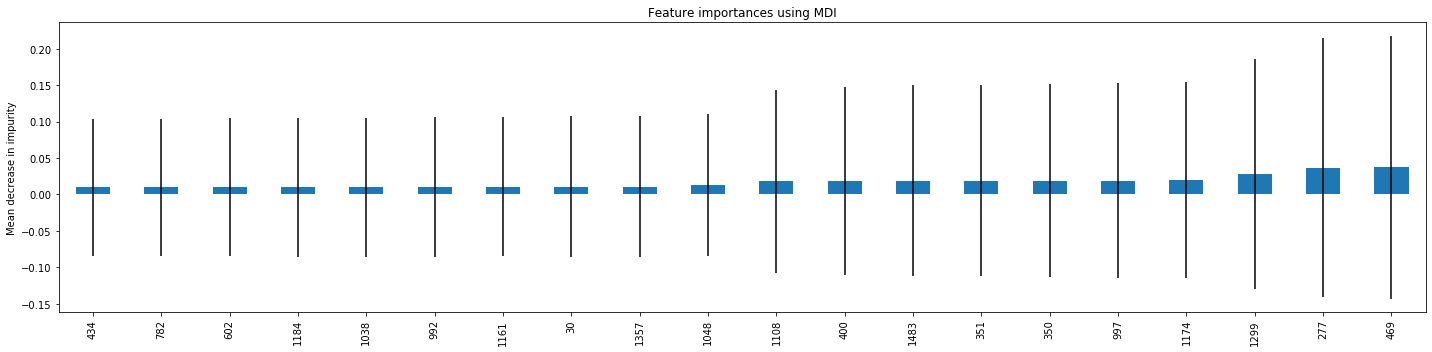

In [174]:
fig, ax = plt.subplots(figsize=(20, 5))
fbg_10fold_mdi_importances.iloc[-20:].plot.bar(yerr=std[-20:], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

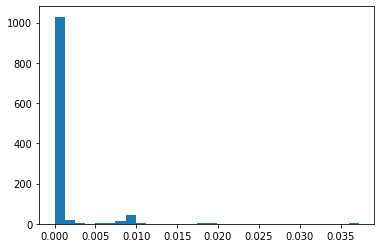

In [175]:
plt.hist(fbg_10fold_mdi_importances, bins=30);

In [184]:
top100importance_fbg_10fold = fbg_10fold_mdi_importances.iloc[-100:]
top100importance_fbg_10fold

1130    0.001774
473     0.001838
1228    0.001849
672     0.001851
1371    0.001858
          ...   
997     0.019092
1174    0.019792
1299    0.027748
277     0.036873
469     0.037233
Length: 100, dtype: float64

In [189]:
top100feats = fr_norm.loc[top100importance_fbg_10fold.index]
top100feats['Lipid Class'].value_counts()

unknown         71
TG              17
PC               3
PI               2
Plasmenyl-PE     2
Plasmenyl-PC     1
Plasmanyl-PE     1
SM               1
AC               1
LysoPC           1
Name: Lipid Class, dtype: int64

### 2. Importance based on permutations

In [179]:
# This calculation takes a loooong time. n_jobs = 8 for number of CPU cores to speed it up 

from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    fbg_10fold, fbg_feats.T, fbg_values, n_repeats=10, random_state=42, n_jobs=8)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 116.370 seconds


NameError: name 'feature_names' is not defined

(array([1.053e+03, 1.800e+01, 1.600e+01, 1.600e+01, 5.000e+00, 1.500e+01,
        7.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.00072461,  0.00069225,  0.00210912,  0.00352598,  0.00494285,
         0.00635971,  0.00777658,  0.00919345,  0.01061031,  0.01202718,
         0.01344404,  0.01486091,  0.01627778,  0.01769464,  0.01911151,
         0.02052837,  0.02194524,  0.0233621 ,  0.02477897,  0.02619584,
         0.0276127 ]),
 <a list of 20 Patch objects>)

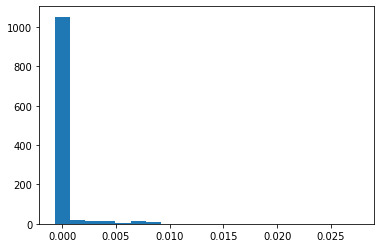

In [182]:
forest_importances = pd.Series(result.importances_mean, index=fbg_feats.index)
plt.hist(forest_importances, bins=20)
